<a href="https://colab.research.google.com/github/dkant000/ML_PROJECT/blob/UrbansoundDetect/urbansound.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install librosa


In [4]:
import matplotlib.pyplot as plt
%matplotlib inline


In [15]:
import IPython.display as ipd
import librosa
import librosa.display
import pandas as pd
import os

In [8]:
!dir

drive  sample_data


In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
# change this line your folder where the data is found
basedir = '/content/drive/MyDrive/data'

## ***EDA***

In [43]:
meta_df = pd.read_csv(os.path.join(basedir, 'UrbanSound8K.csv'))


In [45]:
meta_df['class'].unique()

array(['dog_bark', 'children_playing', 'car_horn', 'air_conditioner',
       'street_music', 'gun_shot', 'siren', 'engine_idling', 'jackhammer',
       'drilling'], dtype=object)

In [ ]:
77770-9-0-1.wav

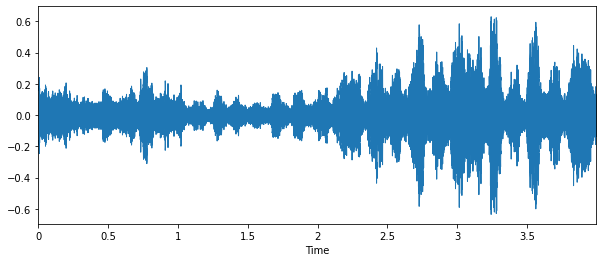

In [54]:
### Street_Music Sound
plt.figure(figsize=(10,4))
data,sample_rate=librosa.load(os.path.join(basedir, "77770-9-0-1.wav"))
librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio((os.path.join(basedir, "77770-9-0-1.wav")))
# ipd.Audio(data)
# data

In [36]:
f_name =(os.path.join(basedir, "77770-9-0-1.wav"))

In [37]:
f_name

'/content/drive/MyDrive/data/77770-9-0-1.wav'

In [38]:
ipd.Audio(f_name)

In [35]:
sample_rate

22050

In [39]:
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio=wav.read(f_name)

In [42]:
wave_sample_rate
wave_audio
data

array([-0.0817505 , -0.01854178,  0.07314408, ..., -0.04050352,
       -0.05669703, -0.05001872], dtype=float32)

In [46]:
### Check whether the dataset is imbalanced
meta_df['class'].value_counts()

air_conditioner     1000
street_music        1000
engine_idling       1000
dog_bark            1000
jackhammer          1000
drilling            1000
children_playing    1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64

## ***PRE-PROCESSING***

In [47]:
### Let's read a sample audio using librosa
import librosa
audio_location=(os.path.join(basedir, "77770-9-0-1.wav"))
librosa_audio_data,librosa_sample_rate=librosa.load(audio_location)

In [48]:
print(librosa_audio_data)

[-0.0817505  -0.01854178  0.07314408 ... -0.04050352 -0.05669703
 -0.05001872]


In [49]:
print(librosa_sample_rate)

22050


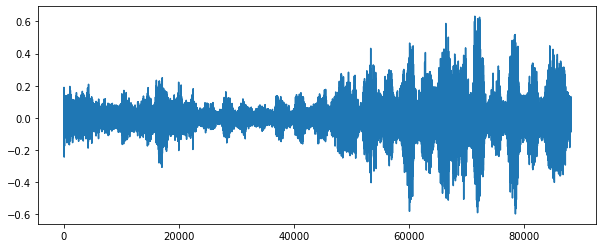

In [53]:
### Plotting librosa audio data
# Original audio with 1 channel 
plt.figure(figsize=(10,4))
plt.plot(librosa_audio_data)

In [55]:
### Lets read with scipy
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(audio_location)

In [56]:
wave_audio

array([[-2716, -3143],
       [ -563,  -821],
       [ 1926,  1885],
       ...,
       [-1706, -1238],
       [-2114, -1604],
       [-1852, -1385]], dtype=int16)

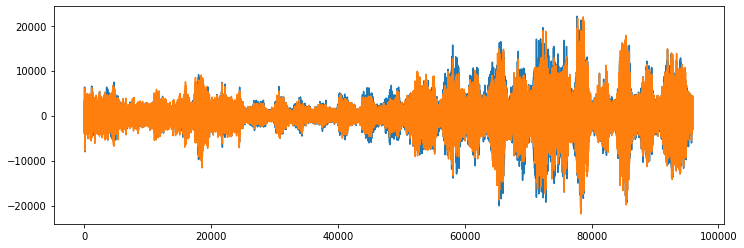

In [57]:
## Plot of 2 channel sound 
plt.figure(figsize=(12, 4))
plt.plot(wave_audio)